<a href="https://colab.research.google.com/github/z3301/DigImgProc_01/blob/main/P1_starter_CAP6619_Summer2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 6619 - Deep Learning - Dr Marques
## Project 1
## Image Classifiers Using Neural Networks and the MNIST and Fashion MNIST Datasets

**Include your name here:** (enter your name)

**Include 'shared link' to 'your' final version of this NB here:** (enter link from above right here)

Useful references and sources:

**MNIST**

- https://www.tensorflow.org/datasets/catalog/mnist

- https://en.wikipedia.org/wiki/MNIST_database 

- https://github.com/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb 

**Fashion MNIST**

- https://www.tensorflow.org/datasets/catalog/fashion_mnist

- https://en.wikipedia.org/wiki/Fashion_MNIST

- https://keras.io/api/datasets/fashion_mnist/

## PART 1 - *MNIST classifier using MLP*




### Import Needed Resources / Libraries

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

from keras import layers

from matplotlib import pyplot as plt

import numpy as np
import tensorflow as tf

### Load and prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


### Examine Data

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

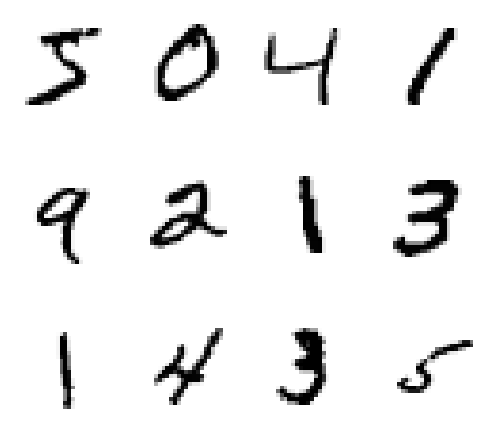

In [ ]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_valid[0]

7

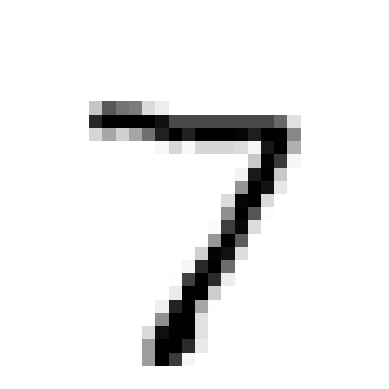

In [ ]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [ ]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [ ]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Configure model

In [ ]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(64*784)

50176

In [ ]:
(64*784)+64

50240

In [ ]:
(10*64)+10

650

In [ ]:
model.compile(
    loss='mean_squared_error', 
    optimizer=SGD(learning_rate=0.01), 
    metrics=['accuracy']
)

### Train!

In [ ]:
batch_size=128
epochs=200

history = model.fit(
  X_training, # training data
  y_training, # training targets
  epochs=epochs,
  batch_size=batch_size,
  verbose=1,
  validation_data=(X_validation, y_validation)
)

Epoch 1/200
469/469 [==============================] - 7s 6ms/step - loss: 0.0910 - accuracy: 0.0884 - val_loss: 0.0907 - val_accuracy: 0.0975
Epoch 2/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0907 - accuracy: 0.0951 - val_loss: 0.0904 - val_accuracy: 0.1080
Epoch 3/200
469/469 [==============================] - 4s 8ms/step - loss: 0.0904 - accuracy: 0.1067 - val_loss: 0.0901 - val_accuracy: 0.1279
Epoch 4/200
469/469 [==============================] - 3s 6ms/step - loss: 0.0901 - accuracy: 0.1283 - val_loss: 0.0898 - val_accuracy: 0.1609
Epoch 5/200
469/469 [==============================] - 3s 5ms/step - loss: 0.0898 - accuracy: 0.1583 - val_loss: 0.0895 - val_accuracy: 0.1906
Epoch 6/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0895 - accuracy: 0.1857 - val_loss: 0.0892 - val_accuracy: 0.2128
Epoch 7/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0892 - accuracy: 0.2106 - val_loss: 0.0890 - val_accuracy: 0.2366

### Plot learning curves

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


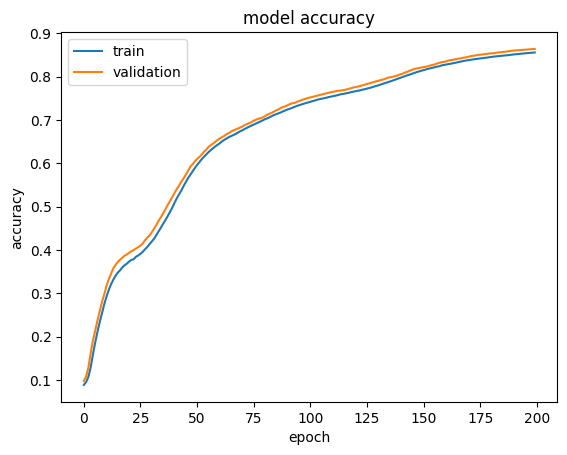

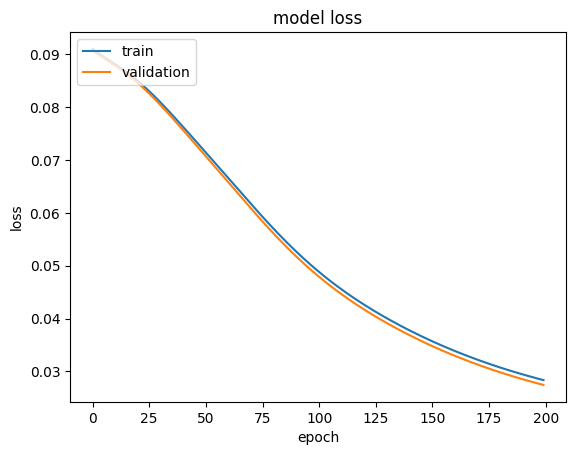

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Evaluate the model

In [ ]:
model.evaluate(X_validation, y_validation)

313/313 [==============================] - 1s 2ms/step - loss: 0.0274 - accuracy: 0.8639


[0.02743183821439743, 0.8639000058174133]

## **PART 1** - *Your Turn* 

### **Part 1 - Tasks:**  *(40 pts)*
1. Write code to display the confusion matrix for your classifier and comment on the insights such confusion matrix provides. See [this](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) for an example.

2. Write code to display 10 cases where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.

#### 1.a. Confusion Matrix *(10 pts)*

In [ ]:
# Your Confusion Matrix code here and in additional cells as needed


#### 1.b. Comment on the insights confusion matrix provides *(10 pts)*

#### 2.Display 10 cases where the classifier makes mistakes. *(20 pts)*

In [ ]:
# Your code here and in additional cells as needed

## PART 2 - *Fashion MNIST*




### Load and prepare the data

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = [28 ,28]

In [ ]:
# Loading and Spliting Data in Test and Train 
(X_train, y_train), (X_valid, y_valid) = tf.keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_valid.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_valid.shape == (10000,)

4422102/4422102 [==============================] - 1s 0us/step


### Defining Classes

In [ ]:
classes_names = ['T-shirt/top' ,  'Trouser' ,'Pullover' , 'Dress', 'Coat','Sandal','Shirt','Sneaker', 'Bag','Ankle Boot'] 

### Examine Data

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_train[0:12]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9], dtype=uint8)

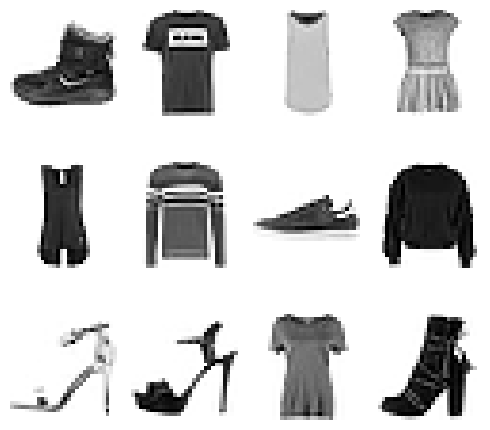

In [ ]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_valid[0]

9

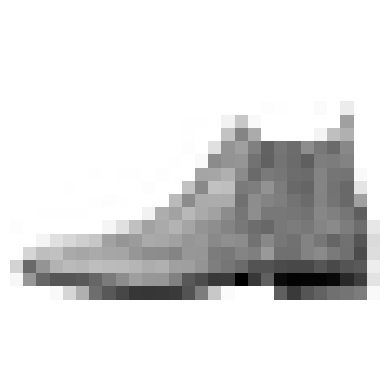

In [ ]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [ ]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [ ]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
print(y_valid[0])
print(y_validation[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## **PART 2** - *Your Turn*

### **Part 2 - Tasks:** *(60 pts)*
Build a NN solution identical to the one before: *(20 pts)*
> a. Plot learning curves *(10 pts)*

> b. Display the confusion matrix for your classifier *(10 pts)*

> c. Evaluate the model, identify accuracy, etc. *(10 pts)*

> d. Discuss why the results are not as good. *(10 pts)*





#### NN solution *(20 pts)*

Configure the Model *(10 pts)*

In [ ]:
# Your Configure the Model code here and in additional code cells as needed
# use same model and hyperparameters as was used for MNIST above


Train the Model  *(10 pts)*

In [ ]:
# Your Train the Model code here and in additional code cells as needed
# same as was used in MNIST above


#### Plot learning curves *(10 pts)*

In [ ]:
# Your Plot learning curves code here and in additional code cells as needed


#### Display the confusion matrix for your classifier *(10 pts)*

In [ ]:
# Your confusion matrix code here and in additional code cells as needed


#### Evaluate the model, identify accuracy, etc. *(10 pts)*

In [ ]:
# Your Evaluate the model code here and in additional code cells as needed


#### Discuss why the results are not as good. 

If you had more time what would you do to improve the results? *(10 pts)*

In [ ]:
# (OPTIONAL) Additional code to demonstrate possible improvements to the model in Part 2.